I will be using the same dataset for the second project as I did for the first project. In addition, I will use one more dataset to verify my hypothesis. In the first part of the project, I did exploratory data analysis without having any assumptions or questions in mind. In this part of the project, I will propose two hypothesis and use the data to either accept or reject those hypotheses. 
The first dataset was collected from : https://data.baltimorecity.gov/City-Government/Baltimore-City-Employee-Salaries-FY2018/biyh-j8tc. 
The data provides us with the salary of the employees of the City of Baltimore for the year 2018. I also work for the City of Baltimore. So, I’m familiar with content of the dataset. The data was discovered from the sources the professor had provided. The data consists of the following information: Name, Job title, Department ID, Description, Hire Date, Annual Income, and Gross Salary. The dataset has 13682 rows and 7 columns. The data is 5.3 megabytes.

The second the dataset was collected from: https://salaries.news.baltimoresun.com/
The data provides us with the salary of the employees of the State of Maryland for the year 2018. The data set was acquired from Baltimore Sun’s yearly publication of government employee salaries. The dataset contains 17 columns and 998,747 rows. I used the following 6 columns to do my analysis: first name, last name, class code, organization, annual salary, and year-to-date earnings. 

Hypothesis 1: On average, state employees earn a bigger salary than city employees. 
Hypothesis 2: The range of salary of city and state employees are about the same. 


In [1]:
import pandas
import numpy as np 
pandas.__version__ #import libraries 

'0.25.1'

In [2]:
state_df = pandas.read_csv('C:\\Users\\nasir\\Desktop\\Data 602\\cy2018-md.csv') #Load the csv file 
state_df.head()

C:\Users\nasir\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (0,1,2,3,4,6,7,10,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,first_name,middle_initial,last_name,suffix,system,agency,organization,subtitle,class_code,annual_salary,pay_rate,regular_earnings,overtime_earnings,other_earnings,ytd_gross_earnings,hire_date,term_date
0,DANIEL,NaN,STAPLES,NaN,RG,360300.0,BALTO CITY COMMUNITY COLLEGE,360300,9004.0,79000.0,A,34000.0,0.0,4000.0,37000.0,5/23/18,0
1,RUBEENA,NaN,ISMAIL,NaN,RG,360300.0,BALTO CITY COMMUNITY COLLEGE,360300,9004.0,58000.0,A,13000.0,0.0,0.0,13000.0,9/12/18,0
2,NICOLE,U,BECKETTS,NaN,RG,360300.0,BALTO CITY COMMUNITY COLLEGE,360300,9004.0,99000.0,A,99000.0,0.0,0.0,99000.0,12/10/98,0
3,ELISABETH,C,MACKEY,NaN,RG,360300.0,BALTO CITY COMMUNITY COLLEGE,360300,9004.0,75000.0,A,75000.0,0.0,2000.0,76000.0,10/18/95,0
4,PAUL,E,SHIVELY,NaN,RG,360300.0,BALTO CITY COMMUNITY COLLEGE,360300,9004.0,90000.0,A,10000.0,0.0,0.0,10000.0,11/7/18,0


In [3]:
city_df = pandas.read_csv('C:\\Users\\nasir\\Desktop\\Data 601\\Week 4\\Baltimore_City_Employee_Salaries_FY2018.csv')
city_df.head() #load the data 

,NAME,JOBTITLE,DEPTID,DESCR,HIRE_DT,ANNUAL_RT,GROSS
0,"Aaron,Patricia G",Facilities/Office Services II,A03031,OED-Employment Dev (031),10/24/1979 12:00:00 AM,60200.0,58480.46
1,"Aaron,Petra L",Assistant State's Attorney,A29045,States Attorneys Office (045),09/25/2006 12:00:00 AM,81200.0,79220.72
2,"Abadir,Adam O",Council Technician,A02002,City Council (002),12/12/2016 12:00:00 AM,64823.0,57375.31
3,"Abaku,Aigbolosimuan O",Police Officer Trainee,A99416,Police Department (416),04/17/2018 12:00:00 AM,50440.0,11881.34
4,"Abbeduto,Mack",Law Clerk SAO,A29017,States Attorneys Office (017),05/22/2017 12:00:00 AM,38926.0,35138.40


In [4]:
state_df = state_df.drop([
'middle_initial',
'system',
'agency',
'subtitle',
'class_code',
'annual_salary',
'pay_rate',
'overtime_earnings',
'other_earnings',
'hire_date',
'term_date'], axis='columns') #drop irrelevant columns

In [5]:
state_df.columns=[
'first_name',
'last_name',
'class_code',
'organization',
'annual_salary',
'ytd_gross_earnings'] #Create a dataframe with important columns
state_df.head()

,first_name,last_name,class_code,organization,annual_salary,ytd_gross_earnings
0,DANIEL,STAPLES,NaN,BALTO CITY COMMUNITY COLLEGE,34000.0,37000.0
1,RUBEENA,ISMAIL,NaN,BALTO CITY COMMUNITY COLLEGE,13000.0,13000.0
2,NICOLE,BECKETTS,NaN,BALTO CITY COMMUNITY COLLEGE,99000.0,99000.0
3,ELISABETH,MACKEY,NaN,BALTO CITY COMMUNITY COLLEGE,75000.0,76000.0
4,PAUL,SHIVELY,NaN,BALTO CITY COMMUNITY COLLEGE,10000.0,10000.0


In [6]:
city_df.columns=['NAME','JOBTITLE','DEPTID','DESCR','HIRE_DT','BASE_PAY','GROSS_EARNING']
city_df.head() #rename columns

,NAME,JOBTITLE,DEPTID,DESCR,HIRE_DT,BASE_PAY,GROSS_EARNING
0,"Aaron,Patricia G",Facilities/Office Services II,A03031,OED-Employment Dev (031),10/24/1979 12:00:00 AM,60200.0,58480.46
1,"Aaron,Petra L",Assistant State's Attorney,A29045,States Attorneys Office (045),09/25/2006 12:00:00 AM,81200.0,79220.72
2,"Abadir,Adam O",Council Technician,A02002,City Council (002),12/12/2016 12:00:00 AM,64823.0,57375.31
3,"Abaku,Aigbolosimuan O",Police Officer Trainee,A99416,Police Department (416),04/17/2018 12:00:00 AM,50440.0,11881.34
4,"Abbeduto,Mack",Law Clerk SAO,A29017,States Attorneys Office (017),05/22/2017 12:00:00 AM,38926.0,35138.40


In [8]:
#import the relevant libraries 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



%matplotlib inline

plt.style.use('bmh')

In [14]:
print("State Employee Salary Statistics:")
print(state_df['annual_salary'].describe()) #View the summary statistics for State Salary 
print('\v')
print("City Employee Salary Statistics:")
print(city_df['GROSS_EARNING'].describe()) #View the summary statistics for City Salary 

State Employee Salary Statistics:
count    109102.000000
mean      44691.096405
std       44122.397519
min           0.000000
25%        5000.000000
50%       43000.000000
75%       63000.000000
max      967000.000000
Name: annual_salary, dtype: float64

City Employee Salary Statistics:
count     13522.000000
mean      60729.312142
std       36197.335957
min           0.000000
25%       37509.352500
50%       57060.665000
75%       81730.975000
max      250197.500000
Name: GROSS_EARNING, dtype: float64


Text(0.5, 0, 'Yearly Salary')

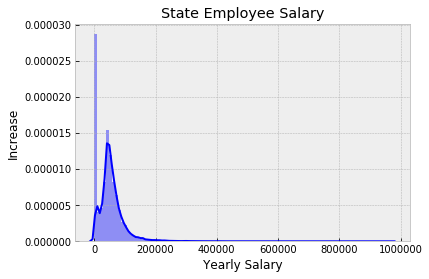

In [27]:
ax1 = sns.distplot(state_df['annual_salary'], color='b', bins=100, hist_kws={'alpha': 0.4});#Plot State Salary distribution
ax1.set_title('State Employee Salary')
ax1.set_ylabel('Increase')
ax1.set_xlabel('Yearly Salary')

Text(0.5, 0, 'Yearly Salary')

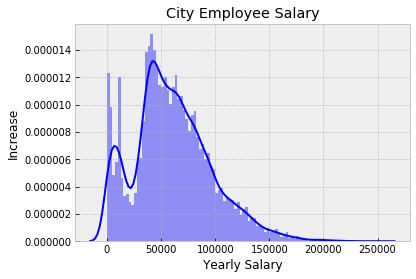

In [25]:
ax = sns.distplot(city_df['GROSS_EARNING'], color='b', bins=100, hist_kws={'alpha': 0.4}); #make a distplot 
ax.set_title('City Employee Salary')
ax.set_ylabel('Increase')
ax.set_xlabel('Yearly Salary')


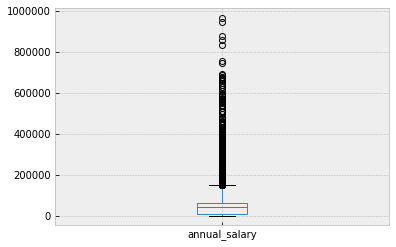

In [28]:
boxplot = state_df.boxplot(column=["annual_salary"]) #boxplot of State Employee Salary 

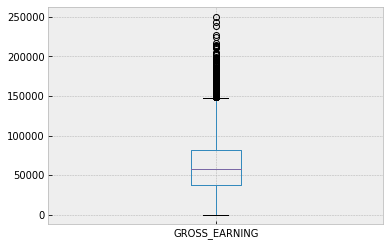

In [29]:
boxplot1 = city_df.boxplot(column=['GROSS_EARNING']) #boxplot of City Employee Salary 

Hypothesis Analysis:
    Hypothesis 1: On average, state employees earn a bigger salary than city employees. 
    Hypothesis 2: The range of salary of city and state employees are about the same. 
After analyzing and visualizing both of the datasets, I have come to the conclusion that my hypothesis were not valid. For 
Hypotheis 1, as you can see from the summary statistics and graphical depictions, the average City employee salary is $60,729 
where as the average State Employee Salary is $44,691. There are couple of explanations for these results. It could be 
that I haven't separated the part time workers from the full-time ones. Also I have not sorted out the different organizations
that the employees work for.(Doing these analysis would be beyond the scope of this project) 
As for Hypothesis 2,actually, the range of state employees is a lot bigger than the city employee one. The city employee
salary ranges from $0 to $250,198 whereas the state employee salary ranges from $0 to $967,000. The explanation for these
results could be that higher level of employees that work for the state than the city. They job is more complex and
requires more expertise, therefore, they get much higher pay. (I could split the executives from the non-excutive employees
which again is beyond the scope of this project)







